<h1> Report Regression Zillow Prices</h1>

<b>We are using the "Clean_Zillow.csv" as a data Framework</b>
<p>To see the Process and explanation of how and why it has been cleaned, with the logic behind it, please check out "classification-tests.ipynb"</p>

<b>Goal</b>
<ul>
<li>Analyse the Dataset and check for ways to optimize</li>
<li>Optimize towards a ML set that Classifies the Type of Almond</li>
<li>For Analysation use:</li>
    <ul>
    <li>Ydata </li>
    <li>dataprep (needs python 3.9)</li>
    <li>AutoViz</li>
    <li>SweetViz</li>
    <li>Phik-Matrix</li>

</ul>
<li>To Answer the following Questions</li>
    <ol>
    <li>Is there Redundancy?</li>
    <li>Problems in the Dataset, like missing Data, or duplicate Rows (Already nswered in the Data Cleaning)</li>
    <li>Is there Overlapping Data and Noise?</li>
    <li>Significant Outliers</li>
    <li>Is the Target Variable Distribution Optimal?</li>
    <li>Are the independent Variables balanced?</li>
    <li>Any other out of the ordinary in your dataset that we should keep an eye on</li>
</ol>
</ul>

<h4>Data Import</h4>
<p>Since we are also doing some Manual Programing in this file we are going to import the Dataset and Libraries</p>

In [15]:
import pandas as pd
import numpy as np
import keras
from keras import layers
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
import tensorflow as tf
import phik
import seaborn as sns
import matplotlib.pyplot as plt

In [16]:
df = pd.read_csv("Clean_Zillow.csv")
df.head()

,longitude,countyFIPS,monthlyHoaFee,annualHomeownersInsurance,state,yearBuilt,latitude,rentZestimate,city,zestimateLowPercent,...,bathrooms,bedrooms,price,zestimateHighPercent,homeType_APARTMENT,homeType_CONDO,homeType_LOT,homeType_MANUFACTURED,homeType_MULTI_FAMILY,homeType_SINGLE_FAMILY
0,-149.90807,2020.0,0.0,2840,AK,1959.0,61.217308,3142.0,Anchorage,12.0,...,2.0,3.0,676100,13.0,0,0,0,0,0,1
1,-149.90822,2020.0,0.0,2934,AK,1961.0,61.217136,3113.0,Anchorage,12.0,...,2.0,3.0,698600,13.0,0,0,0,0,0,1
2,-149.90833,2020.0,0.0,4187,AK,1983.0,61.217000,4282.0,Anchorage,12.0,...,3.0,4.0,996800,14.0,0,0,0,0,0,1
3,-149.90834,2020.0,0.0,2920,AK,1947.0,61.216720,3458.0,Anchorage,15.0,...,2.0,5.0,695300,16.0,0,0,0,0,0,1
4,-149.90749,2020.0,0.0,4100,AK,2000.0,61.217120,4161.0,Anchorage,18.0,...,4.0,4.0,976100,24.0,0,1,0,0,0,0


In [17]:
# everything else except the target variable
X = df.drop(["price"], axis=1)
y = df['price']

<h2>1. Redundancy Overlapping and Noise</h3>
<b>A bit of 1 to 1 Redundancy was already removed during the Data preparation </b>

In [18]:
cf=df.drop(["state","city"],axis=1)
correlations = cf.corr()
correlations

,longitude,countyFIPS,monthlyHoaFee,annualHomeownersInsurance,yearBuilt,latitude,rentZestimate,zestimateLowPercent,timeOnZillow,zestimate,...,bathrooms,bedrooms,price,zestimateHighPercent,homeType_APARTMENT,homeType_CONDO,homeType_LOT,homeType_MANUFACTURED,homeType_MULTI_FAMILY,homeType_SINGLE_FAMILY
longitude,1.000000,0.829698,0.005989,0.029225,0.108793,-0.945561,-0.022428,0.065393,-0.101655,0.029921,...,0.021958,-0.043758,0.029220,0.114303,-0.011157,-0.001048,-0.004520,0.105002,0.016817,-0.031066
countyFIPS,0.829698,1.000000,0.000847,-0.009010,0.072118,-0.769247,-0.049002,0.053720,-0.081454,-0.008316,...,0.000303,-0.044299,-0.009016,0.095102,-0.009190,-0.015468,-0.003652,0.063112,0.015090,-0.017484
monthlyHoaFee,0.005989,0.000847,1.000000,-0.069832,0.021940,-0.005867,-0.056949,0.002987,-0.021259,-0.069903,...,-0.025672,-0.062488,-0.069841,-0.001958,0.006743,0.139508,-0.003268,-0.004099,-0.018520,-0.107953
annualHomeownersInsurance,0.029225,-0.009010,-0.069832,1.000000,0.149498,-0.042470,0.817829,-0.075643,-0.017094,0.999763,...,0.655338,0.543902,1.000000,0.046313,-0.061658,-0.464857,-0.009349,-0.067026,0.137042,0.332175
yearBuilt,0.108793,0.072118,0.021940,0.149498,1.000000,-0.125399,0.190973,-0.417606,-0.039662,0.149442,...,0.231239,0.028390,0.149503,-0.376016,-0.009128,0.103445,-0.056298,0.021460,-0.096553,-0.036220
latitude,-0.945561,-0.769247,-0.005867,-0.042470,-0.125399,1.000000,0.013862,-0.059810,0.111996,-0.043056,...,-0.054760,0.021497,-0.042465,-0.109282,0.011458,-0.002090,0.004540,-0.134916,-0.017793,0.037493
rentZestimate,-0.022428,-0.049002,-0.056949,0.817829,0.190973,0.013862,1.000000,-0.172589,-0.016405,0.817793,...,0.613871,0.486162,0.817832,-0.078796,-0.112305,-0.424835,-0.049680,-0.051256,-0.048744,0.435588
zestimateLowPercent,0.065393,0.053720,0.002987,-0.075643,-0.417606,-0.059810,-0.172589,1.000000,0.221238,-0.074298,...,-0.142239,-0.086614,-0.075639,0.959298,0.120696,0.126643,0.225698,0.166379,0.058938,-0.186401
timeOnZillow,-0.101655,-0.081454,-0.021259,-0.017094,-0.039662,0.111996,-0.016405,0.221238,1.000000,-0.016011,...,-0.064270,-0.000831,-0.017093,0.168693,-0.019869,-0.003873,-0.003231,-0.010943,0.015665,0.033528
zestimate,0.029921,-0.008316,-0.069903,0.999763,0.149442,-0.043056,0.817793,-0.074298,-0.016011,1.000000,...,0.655153,0.544087,0.999763,0.047658,-0.061683,-0.465131,-0.009341,-0.067088,0.136705,0.332724


<ul>
<li>Price has:</li>
<li>1-0.99 with:</li>
    <ul>
    <li>Has a 1.0 Corr with annualHomeownersInsurance <p>I think insurance is calculated with the Price for the Home so this makes sense</p></li>
    <li> The zestimated price is very accurate it has a corr of 0.999763 <p>So to not justhave the modell copy the zestimation we should drop it, and maybe set it as target to be more accurate than it (even if this is probably impossible)</p></li>
    </ul>
<li>0.85 - 0.75 (sweet spot)</li>
    <ul>
    <li> 0.84533 with living Area, <p>Makes sense</p></li>
    <li> 0.81 corr with rentZestimate <p>Estimated Rent = Higher price also makes sense</p></li>
    </ul>
<li>0.70 - 0.4</li>
    <ul>
    <li> 0.65534 bathrooms</li>
    <li> 0.54390 bedrooms</li>
    </ul>
<li>0.2 - 0.0 (consider dropping)</li>
    <ul>
    <li> 0.14950 Year Build</li>
    </ul>
<li>0.09 - 0.00 (Should be Dropped or Combined)</li>
    <ul>
    <li>-0.07563 zestimateLowPercent</li>
    <li>-0.06984 MonthlyHOAFee <p></p></li>
    <li> 0.04632 zestimateHighPercent</li>
    <li>-0.04246 Latitude</li>
    <li>-0.03948 Property Tax Rate</li>
    <li> 0.02921 Longitude</li>
    <li>-0.02860 Zip Code </li>
    <li>-0.01709 time on zillow </li>
    <li>-0.00901 countyFIPS </li>
    <li>-0.00934 with HOMETYPE_Lot <p>The reason for this one is more complex since only 7 out of the 5000 homes are Lots, and the reason for it to be that way is beccause the hometype got onehot encoded</p></li>
    <li>Other negative Correlation HOMETYPES are:</li>
        <ul>
        <li>APARTMENT (44) with -0.061652</li>
        <li>CONDO (700) -0.464860 <p>You can see with more Condos the correlation rises</p></li>
        <li>MANUFACTURED (11) -0.067029</li>
        </ul>
    <li><p>Even though deleting these Low correlation houses, would only be 62 Datas lost i think maybe Grouping them is the better Option and if the correlation is still too low having them all deleted and be "other" (when all others are 0) is also a valid option</p></li> 
</ul>
</ul>

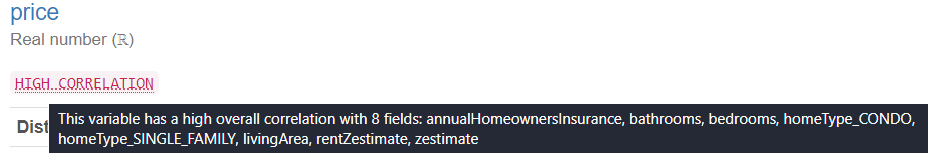

<p>bathrooms,bedrooms, living area,homeType_SINGLEFAMILY and rentZestimate will be the columns i will focus on and try to Analyse </p>
<p> According to ydata the correlation of the price for bathroom and bedroom is 0.71 and 0.6 so higher than here</p>

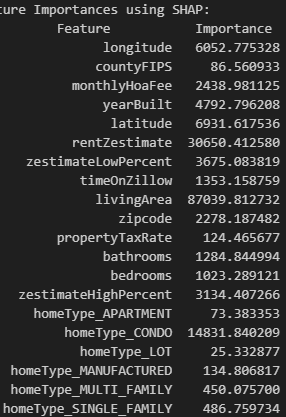
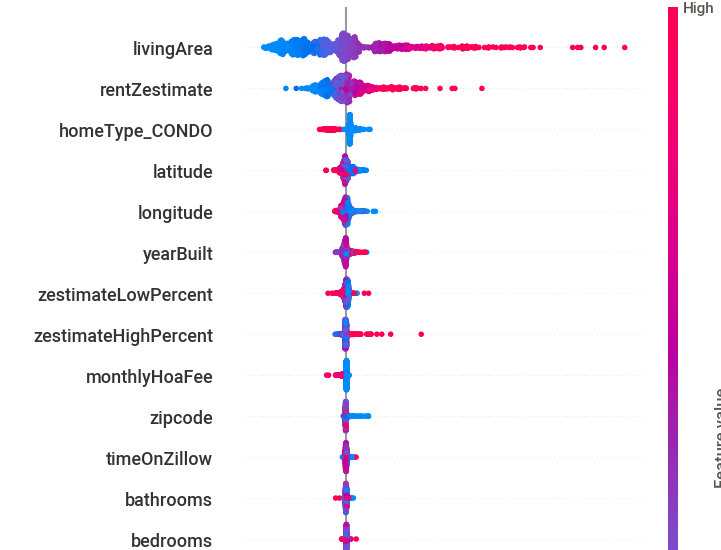

<p>Shap says that longitude and latitude is actually important</p>

<h2>2. Problems</h2>
<b>Please read the -tests.ipynb for this chapter, since those points where analysed while preparing the data to be reportable</b>
<p> Having city and State not beeing analysable, but also since there are 50 different ones you can't hot encode</p>

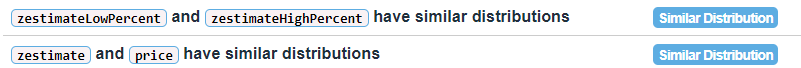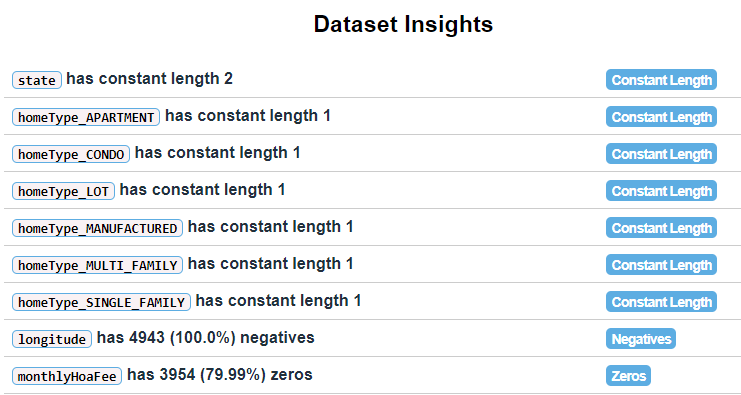

<p>Dataprep comes to the same conclusion as I and most of the data that isnt skewed, is already on the removal list</p>

<h4>Explanation and Summary of Chapter 1</h4>
<p>When Looking at the Low Correlation Values there is a Serious Trend that the less of something there is, the lower the correlation is (makes sense)</p>

<ul>
HOMETYPE
<li>There are 6 Different hometype (and the one removed with onehot encoder)</li>
<li>But looking at the amount each hometype has a clear trend is visible</li>
<ul>
<li>SINGLE_FAMILY: 3600</li>
<li>CONDO: 750</li>
<li>MULTI_FAMILY: 411</li>
<li>APARTMENT: 44</li>
<li>MANUFACTURED: 11</li>
<li>LOT: 7</li></ul>
<li><p>If you don't want to loose the Data, since a better Spread could increase the Correlation, maybe data generation is needed i think <b>Undersampling</b> would be best here</p></li>
Having a bad Distribution:
<li>monthlyHoaFee: (500 times its 0)</li>
<li>property Tax Rate (4800 times its between 1.2 and 1.4)<p>This could be a case of outliers Obscuring the distribution 1 removing all 0.2-1.2 would only remove 42 and 1.6-2.6 would remove 20 (see image 1)</p></li>
<li>Longitude: (4.800 = -152 to -148) <p> Explanation: Looking at the state and City Data 99% of the Homes are from Anchorage so them having a Similar Longitude is Obvious</p></li>
<li>Zip Code: <p>Exactly the same explanation as Latitude, Also they have an almsot 0.9 Correlation so maybe undersampeling one and dropping the other could be a good idea</p></li>
<li>Latitude: <p>Same as Longitude and Zimp Code they all are geographical messurements, so the same states have similar messurements, the variation in correlation is because latitude and longitude also include other citys an states on that same horizontal/vertical lines</p></li>
<li>countyFIPS: Same geographical rules as ZIP</li>

Just Bad
<li>Year build: good distribution, just irrelevant</li>
<li>Time on Zillow: It seems people are not decreasing their prices even if the house stays longer on Zillow</li>
<li> Zestimations <p>I think those should be removed anyway since they might skewer the algorythm too much</p></li>
<ul>
<li>annualHomeownersInsurance</li>
<li>zestimated price</li>
<li>zestimateLowPercent</li>
<li>zestimateHighPercent</li>
<li><p>For zestimated rent i am not sure sicne it does have the perfect correlation score, but at the same time i already spend 1 hour just analysing the correlation matrix, and that one isnt even on the list of Reports i should do. <b>BUT IT ALREADY TOLD ME SO MUCH.</b> Why use 6 Reports when 1 simple one is so great at telling? (Im kidding obv its for training purpouses, butyk its 2am i have to entertain myself somehow)</p></li>
</ul>
</ul>

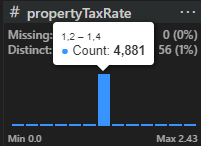
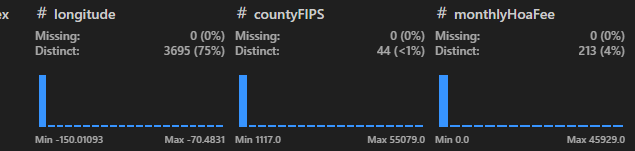

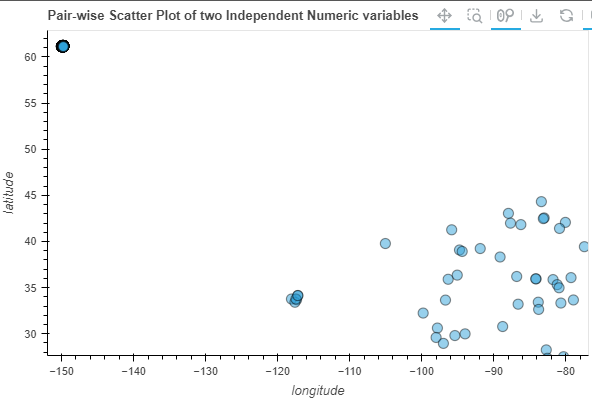

<h3>SUMMARY of SUMMARY</h3>
<ol>
<li>Geographics</li>
<p>99% of all States are Anchorage, this makes Geographical data 1. Not very relevant 2. Very Similar.</p>
<p>I think its best to choose 1 of them, like ZIP Code (Because Lat and Long are not only that 1 state/city) and remove the Rest</p>
<ul>
<li>State</li>
<li>City</li>
(those arent usable for reports or machine learning anyway)
<li>longitude</li>
<li>Latitude</li>
<li>countyFIPS</li></ul>

<li>Keeping for further Analysis:</li>
<ul>
<li>All the Housing Types (but grouped)</li>
<li>propertyTaxRate</li></ul>

<li>Should be Removed:</li>
<ul>
<li>monthlyHoaFee</li>
<li>zestimated price</li>
<li>zestimateLowPercent</li>
<li>zestimateHighPercent</li>
<li>yearBuilt</li>
<li>timeOnZillow</li>
</ul>
</ol>

In [19]:
#Since state and city can't be reported on i drop it now (i didn't before because it wasnt metadata)
df=df.drop(["state","city"], axis=1)


<h4>Associations</h4>
<p>They are perfectly symetrical wich is a bit problematic since this means there is not a lot need for optimization</p>

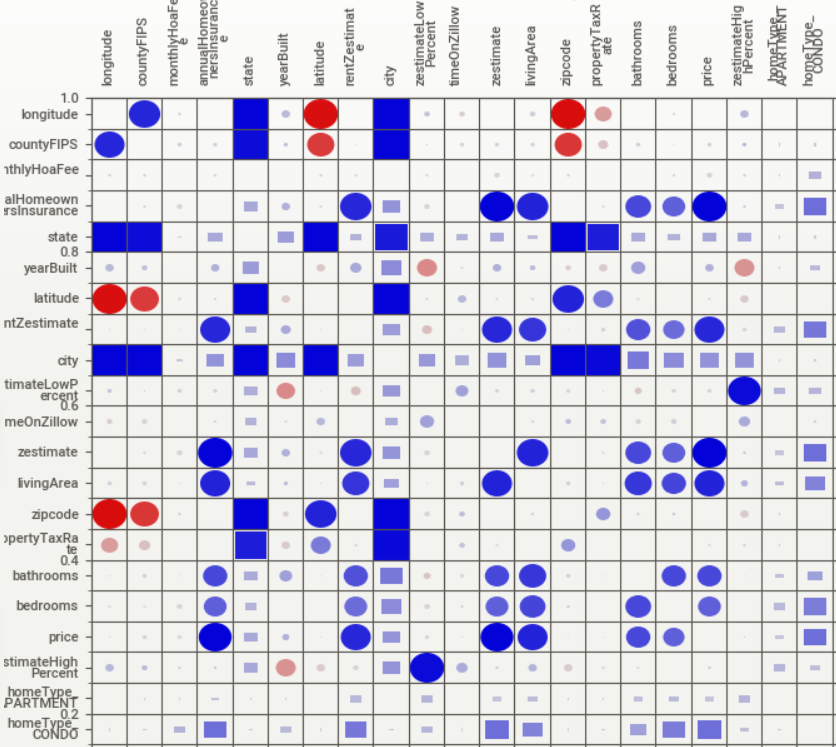

<p>Property tax rate is also connected to state and city, it only has a high combination with those 2, so it can be used as stand in for these 2 as numerical value</p>

<h2>3. Outliers</h2>

In [21]:
def find_outliers(col):
    q1 = col.quantile(.15)
    q3 = col.quantile(.85)
    IQR = q3 - q1
    ll = q1 - (1.5*IQR)
    ul = q3 + (1.5*IQR)
    upper_outliers = col[col > ul].index.tolist()
    lower_outliers = col[col < ll].index.tolist()
    bad_indices = list(set(upper_outliers + lower_outliers))
    return(bad_indices)
# get all bad indexes into a list
bad_indexes = []
for col in df.columns:
    if df[col].dtype in ["int64","float64"]:
        bad_indexes.append(find_outliers(df[col]))

bad_indexes = set(list(np.concatenate(bad_indexes).flat))

# how many outlier rows we have
print(len(bad_indexes))

1169


<p> too radical i think, going to outliers for each column might be better</p>

<b>Price outliers</b>

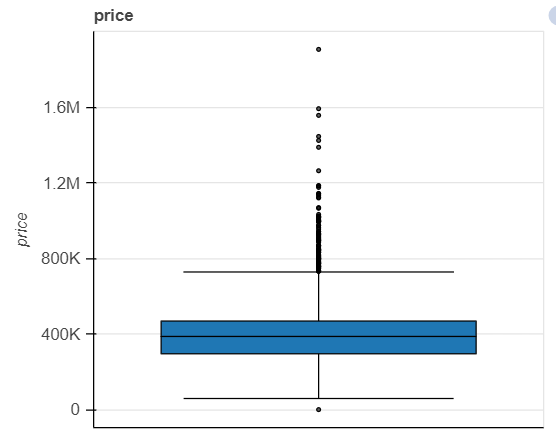

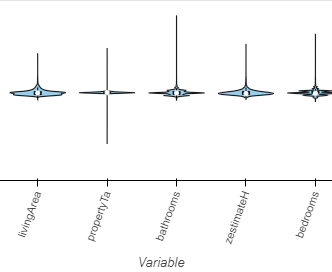

<p>propertyTax , bathrooms and bedrooms have a lot of strong outliers</p>

<b>bathrooms</b>

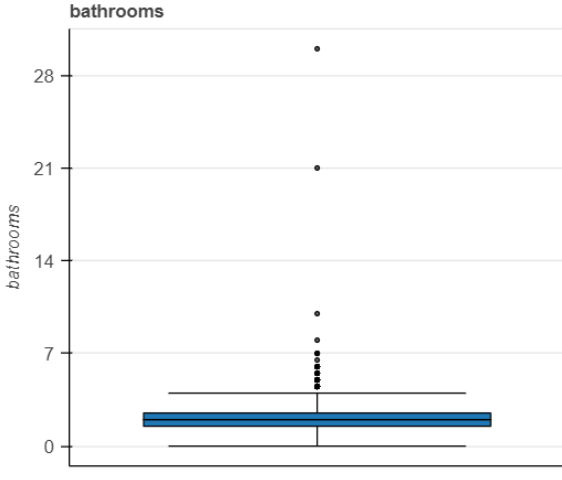
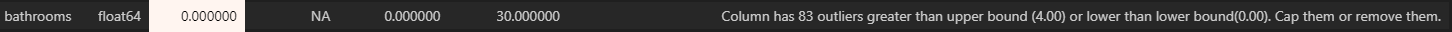

<b>bedrooms</b>

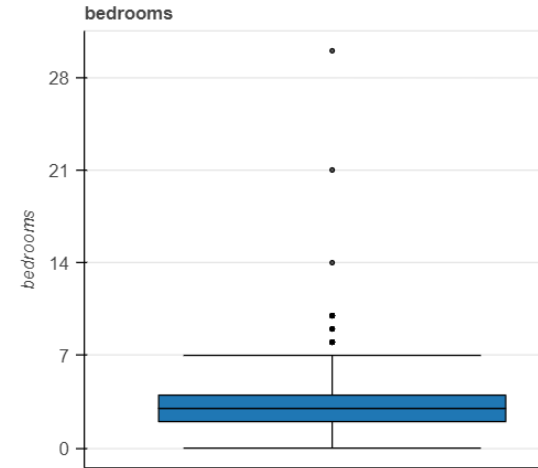


<b>living area</b>
<p>zestimate will already be dropped</p>

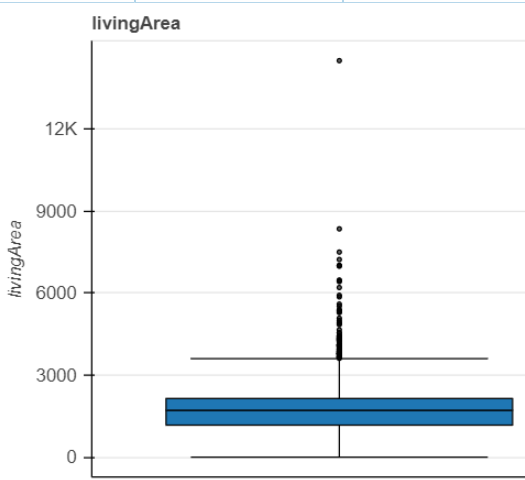
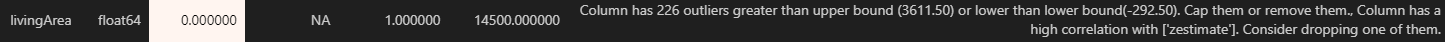

<b>rentZestimate</b>

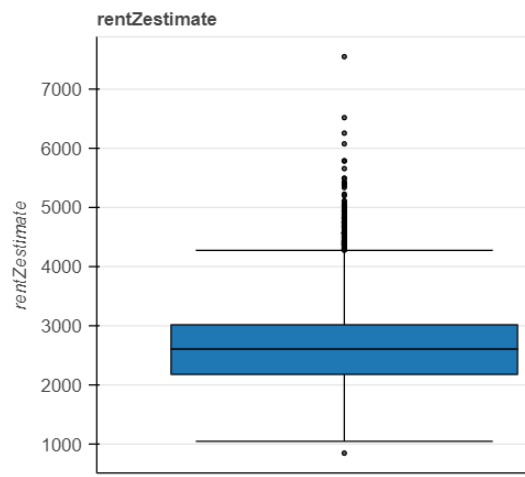


<h2>4. Distribution and Balance of Variables</h2>

<b>Price</b>

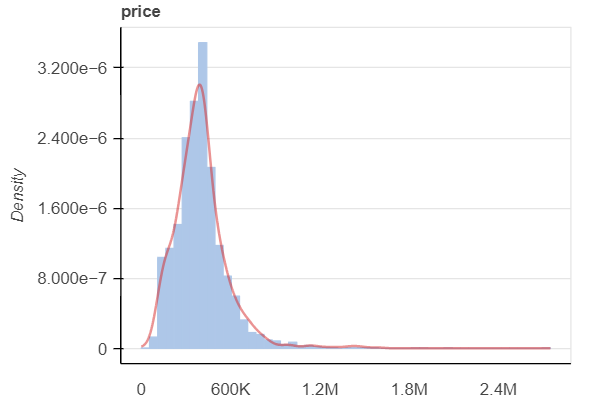


<b>bathrooms</b>


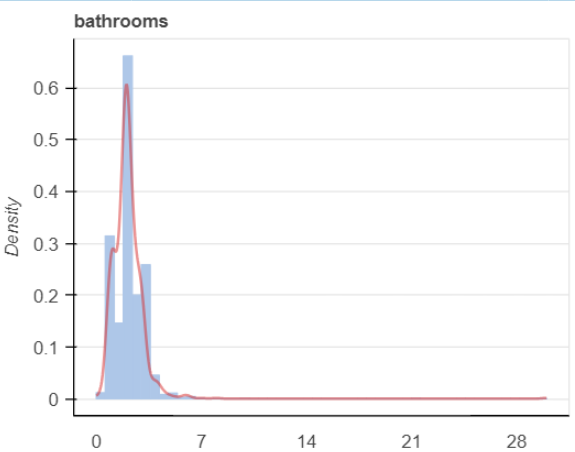

<b>bedrooms</b>

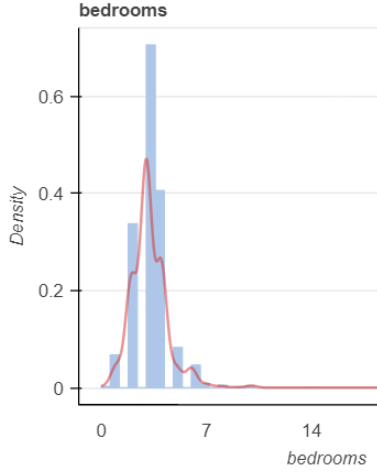

<b>living area</b>

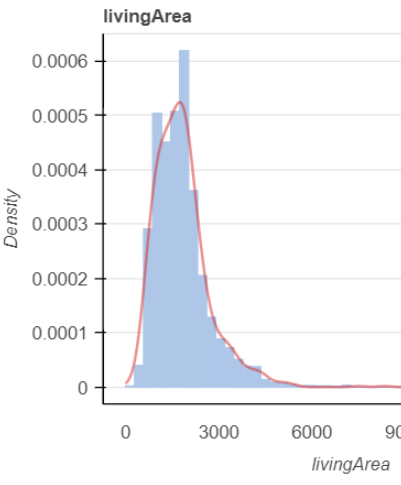

<b>rentZestimate</b>

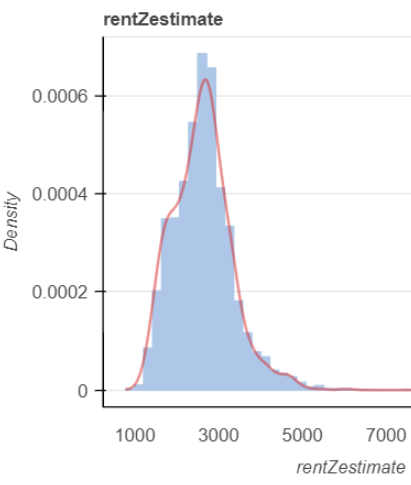

<h2>Summary</h2>

<ul>
<li>Remove from the List</li>
<li>Cap the outliers, especially for the 6 focused on columns</li>
<li>Next Homework, fix distribution with synthetic Data for the ones where autovizviz, ydata and SHAP say the importance is higher (only for the kept columns, maybe redo all the reports with the cut down data)</li>
</ul>